# Prophet : Prediction of spares parts

## we focus on the pieces > 50. The main objectives are:
##### 1. See if Prophet can well predict the commande
##### 2. See which pieces work well but which not. Their feutures.

## In this way, we creat 4 lists to save the pieces. 
###### List 1 works best, with prediction error <0.1
###### List 2 works good, with prediction error <0.4
###### List 3 works bad, with prediction error 0.4 ~ 0.9
###### List worst works worst, with prediction error >0.9

#### Then we try to tune the prophet parameters for list 2,3 to have a better result

In [1]:
## import and load in
import pandas as pd
import numpy as np
from fbprophet import Prophet
import os

# select the name whose total command are >100 and save them in PARAs
df1 = pd.read_excel("encoded_pic_septembre_2018.xlsx")
df2=df1.groupby(by=['item',df1.index]).sum()
df3=df2.groupby(['item']).size()
df4 = df3.sort_values()
PARAs = df4[1450:-1].index
# >50: >1450

In [2]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
error_list = []

list1=[]
list2=[]
list3=[]
worst=[]

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in PARAs:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.5, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    if error<0.1:
        list1.append(PARA)
    else:
        if error<0.4:
            list2.append(PARA)
        else:
            if error<0.9:
                list3.append(PARA)
            else:
                worst.append(PARA)
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)

/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alliance PREDICT_error: 0.9872462401506036


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ankeny PREDICT_error: 1.7773681401142092


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darlington PREDICT_error: 0.4168289617725054


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Greensboro PREDICT_error: 0.37139017173413863


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chelan PREDICT_error: 25.9335336627517


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Columbiana PREDICT_error: 0.0789737344378409


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dayton PREDICT_error: 0.7641520547095131


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Clifton PREDICT_error: 0.14309700595054053


/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cleveland Heights PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elgin PREDICT_error: 0.2352836620478167


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alice PREDICT_error: 0.9878455643775387


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bucyrus PREDICT_error: 0.4608741397793262


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ammon PREDICT_error: 0.998165981378159


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Hills PREDICT_error: 0.0062275814704968015


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ferriday PREDICT_error: 0.10773783688140424


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fowler PREDICT_error: 1.7135790604750802


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Groveland PREDICT_error: 0.4842863876451526


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galesburg PREDICT_error: 0.6507197936459088


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Floresville PREDICT_error: 0.9974959848772852


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gloucester City PREDICT_error: 0.5399606341643237


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gramercy PREDICT_error: 1.9671527343677013


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenwood PREDICT_error: 0.23643749079426984


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camas PREDICT_error: 0.9806060540959086


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Faribault PREDICT_error: 0.31830602001090114


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Charleston PREDICT_error: 0.8670646438654543


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarhurst PREDICT_error: 0.08444966506451337


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Valley PREDICT_error: 1.01604770512906


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Columbus PREDICT_error: 0.7925740090796264


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dickson City PREDICT_error: 0.06851981716203684


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alpine PREDICT_error: 1.0


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crookston PREDICT_error: 0.38970763344416987


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bay Minette PREDICT_error: 0.04725839905301657


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Garner PREDICT_error: 0.24735003347304196


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grenoble PREDICT_error: 0.7971712488817104


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catoosa PREDICT_error: 0.29648991004500214


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmers Branch PREDICT_error: 0.2370611896717557


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buckeye PREDICT_error: 0.538846673018393


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Campo PREDICT_error: 0.04720470086174089


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Erie PREDICT_error: 1.6720661860900243


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cullman PREDICT_error: 0.5401495176237325


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fargo PREDICT_error: 0.1898727159754592


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bonita Springs PREDICT_error: 0.3981237914192197


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamogordo PREDICT_error: 1.6361742119364695


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkton PREDICT_error: 0.4897097895239968


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gas City PREDICT_error: 0.3262196961719849


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fletcher PREDICT_error: 1.6693785314498086


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Davidson PREDICT_error: 0.7120912079083861


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florissant PREDICT_error: 0.23765648988270627


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ellensburg PREDICT_error: 0.1381872295986009


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Center Point PREDICT_error: 0.24217486426895823


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamo Heights PREDICT_error: 1.4127206916917203


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Giffnock PREDICT_error: 0.19052662319514974


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florida City PREDICT_error: 0.7238240167986353


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayslake PREDICT_error: 0.5704905639038165


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Altus PREDICT_error: 0.994691989613018


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Monte PREDICT_error: 0.5767449130836112


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Campbellsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camberwell PREDICT_error: 0.9880902778877632


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenn Heights PREDICT_error: 0.36496871062847164


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Flower Mound PREDICT_error: 0.0602511359897347


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton Harbor PREDICT_error: 0.4182280999633181


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canby PREDICT_error: 0.3061434667659555


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Coleraine PREDICT_error: 0.01206597863444823


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Inn PREDICT_error: 0.5822975684239093


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gillespie PREDICT_error: 0.05153874569727584


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkin PREDICT_error: 0.5564555779614936


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gaffney PREDICT_error: 0.04695379797160228


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bensenville PREDICT_error: 0.5426667919021052


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Carteret PREDICT_error: 0.43488720809359954


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bryan PREDICT_error: 0.5455078109884921


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cartersville PREDICT_error: 3.5349222767100628


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chester PREDICT_error: 0.25443951874661414


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buellton PREDICT_error: 0.6408018892035009


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cloquet PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florham Park PREDICT_error: 0.958676511709333


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


College Park PREDICT_error: 29.471057271261273


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darien PREDICT_error: 0.6218377570633579


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gastonia PREDICT_error: 0.09746337911566785


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayson PREDICT_error: 0.49980392726424977


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glendora PREDICT_error: 0.010537870375066214


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galax PREDICT_error: 0.41706257981292366


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington PREDICT_error: 0.4418920663226927


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Belvidere PREDICT_error: 0.09420428913519703


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fairfield PREDICT_error: 1.0002366892473902


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dardenne Prairie PREDICT_error: 0.6688370767881829


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Paso PREDICT_error: 0.23626607698255403


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fort Bragg PREDICT_error: 0.18489173682973137


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Mirage PREDICT_error: 0.105506466400625


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenolden PREDICT_error: 1.814193332550983


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glens Falls PREDICT_error: 0.31413114985707374


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grosse Pointe Park PREDICT_error: 0.6923208552064921


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cahokia PREDICT_error: 0.5063087545378534


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cameron PREDICT_error: 0.2074094189641086


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canfield PREDICT_error: 0.053760369640860305


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camden Town PREDICT_error: 0.3853617308308474


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Calera PREDICT_error: 0.3268262280021697


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarburg PREDICT_error: 0.4215631566005854


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canal Fulton PREDICT_error: 0.8058655720955872


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bay Harbor Islands PREDICT_error: 0.06513675084875226


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkhart PREDICT_error: 0.22011840641202954


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheney PREDICT_error: 0.5272039741937116


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Dorado PREDICT_error: 0.025801684623792


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catasauqua PREDICT_error: 0.6895581654773387


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Cerrito PREDICT_error: 0.028788917421913744


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elberton PREDICT_error: 1.0625190035613308


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Hill PREDICT_error: 0.048401528824346556


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmersville PREDICT_error: 0.06002581364481521


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmville PREDICT_error: 0.09275186031203238


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collegeville PREDICT_error: 0.7037648122076031


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington Hills PREDICT_error: 0.13824475502125663


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elburn PREDICT_error: 0.5139219722203928


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collingdale PREDICT_error: 0.5019026805744427


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Falls PREDICT_error: 1.18231792727266


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catford PREDICT_error: 6.399719302732649


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bennettsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheraw PREDICT_error: 0.40421128234613635


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cave Creek PREDICT_error: 1.6516937088720927


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crockett PREDICT_error: 0.6055296262683302
Eldridge PREDICT_error: 0.14823789688282007


In [3]:
list1

['Columbiana',
 'Cedar Hills',
 'Cedarhurst',
 'Dickson City',
 'Bay Minette',
 'El Campo',
 'Flower Mound',
 'Coleraine',
 'Gillespie',
 'Gaffney',
 'Gastonia',
 'Glendora',
 'Belvidere',
 'Canfield',
 'Bay Harbor Islands',
 'El Dorado',
 'El Cerrito',
 'Cedar Hill',
 'Farmersville',
 'Farmville']

In [4]:
list2

['Greensboro',
 'Clifton',
 'Elgin',
 'Ferriday',
 'Glenwood',
 'Faribault',
 'Crookston',
 'Garner',
 'Catoosa',
 'Farmers Branch',
 'Fargo',
 'Bonita Springs',
 'Gas City',
 'Florissant',
 'Ellensburg',
 'Center Point',
 'Giffnock',
 'Glenn Heights',
 'Canby',
 'Chester',
 'El Paso',
 'Fort Bragg',
 'El Mirage',
 'Glens Falls',
 'Cameron',
 'Camden Town',
 'Calera',
 'Elkhart',
 'Farmington Hills',
 'Eldridge']

In [5]:
list3

['Darlington',
 'Dayton',
 'Bucyrus',
 'Groveland',
 'Galesburg',
 'Gloucester City',
 'Charleston',
 'Columbus',
 'Grenoble',
 'Buckeye',
 'Cullman',
 'Elkton',
 'Davidson',
 'Florida City',
 'Grayslake',
 'El Monte',
 'Benton Harbor',
 'Fountain Inn',
 'Elkin',
 'Bensenville',
 'Carteret',
 'Bryan',
 'Buellton',
 'Darien',
 'Grayson',
 'Galax',
 'Farmington',
 'Dardenne Prairie',
 'Grosse Pointe Park',
 'Cahokia',
 'Cedarburg',
 'Canal Fulton',
 'Cheney',
 'Catasauqua',
 'Collegeville',
 'Elburn',
 'Collingdale',
 'Cheraw',
 'Crockett']

In [6]:
worst

['Alliance',
 'Ankeny',
 'Chelan',
 'Cleveland Heights',
 'Alice',
 'Ammon',
 'Fowler',
 'Floresville',
 'Gramercy',
 'Camas',
 'Fountain Valley',
 'Alpine',
 'Erie',
 'Alamogordo',
 'Fletcher',
 'Alamo Heights',
 'Altus',
 'Campbellsville',
 'Camberwell',
 'Cartersville',
 'Cloquet',
 'Florham Park',
 'College Park',
 'Fairfield',
 'Glenolden',
 'Benton',
 'Elberton',
 'Cedar Falls',
 'Catford',
 'Bennettsville',
 'Cave Creek']

###### By changing the parameters, we want to see if some pieces in list2 becomes better

In [7]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
list1_2 = []
list2_2 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list2:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)
    if error<0.1:
        list1_2.append(PARA)
    else:
        list2_2.append(PARA)

/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Greensboro PREDICT_error: 0.005861224010409956


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Clifton PREDICT_error: 0.07911855960057797


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elgin PREDICT_error: 0.5424056062109043


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ferriday PREDICT_error: 0.17200900658200777


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenwood PREDICT_error: 0.2083511595890056


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Faribault PREDICT_error: 0.37969746806110877


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Crookston PREDICT_error: 0.11292335236311857


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Garner PREDICT_error: 0.009974467962039438


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catoosa PREDICT_error: 0.059893271543843773


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmers Branch PREDICT_error: 0.15286409298137962


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fargo PREDICT_error: 0.36226725125782294


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bonita Springs PREDICT_error: 0.4658170458829886


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gas City PREDICT_error: 0.17446407557593774


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florissant PREDICT_error: 0.4147889964421996


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ellensburg PREDICT_error: 0.5863502665017336


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Center Point PREDICT_error: 0.552613967046462


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Giffnock PREDICT_error: 0.15419257296812738


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenn Heights PREDICT_error: 0.04449132089972799


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canby PREDICT_error: 1.3787081002558936


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chester PREDICT_error: 0.7391498582418452


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Paso PREDICT_error: 0.6231305502086415


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fort Bragg PREDICT_error: 0.4693300516470357


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Mirage PREDICT_error: 0.2898333933417903


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glens Falls PREDICT_error: 0.648712256376724


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cameron PREDICT_error: 2.1965496123850623


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camden Town PREDICT_error: 0.9206220032168021


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Calera PREDICT_error: 0.14728732179756193


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkhart PREDICT_error: 0.5838685130007573


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington Hills PREDICT_error: 0.09652524215022563
Eldridge PREDICT_error: 0.2240834415513538


In [8]:
print(np.mean(error_list))
print(np.std(error_list))

0.42652946832176963
0.4464817074396358


###### There are the pieces in list2 which works well after tuning the parameters

In [9]:
print(list1_2)

['Greensboro', 'Clifton', 'Garner', 'Catoosa', 'Glenn Heights', 'Farmington Hills']


###### Lets see list 3 now

In [10]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
list1_3 = []
list2_3 = []
list3_3 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list3:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)
    if error<0.1:
        list1_3.append(PARA)
    else:
        if error<0.4:
            list2_3.append(PARA)
        else:
            list3_3.append(PARA)

/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darlington PREDICT_error: 0.4636747583981382


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dayton PREDICT_error: 0.0365769930353165


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bucyrus PREDICT_error: 0.07588375937504437


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Groveland PREDICT_error: 0.3304125125959166


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galesburg PREDICT_error: 1.583670694250736


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gloucester City PREDICT_error: 0.08809109748103834


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Charleston PREDICT_error: 0.688759043324732


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Columbus PREDICT_error: 0.5271695589882636


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grenoble PREDICT_error: 0.16204118724178898


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buckeye PREDICT_error: 0.025449332898891376


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cullman PREDICT_error: 0.15032115616157143


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkton PREDICT_error: 0.5604453236751921


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Davidson PREDICT_error: 0.2635200277505757


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florida City PREDICT_error: 0.06445554273390154


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayslake PREDICT_error: 0.3501834656811177


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Monte PREDICT_error: 0.23322870167910442


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton Harbor PREDICT_error: 0.016387002466815473


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Inn PREDICT_error: 0.6648859905064288


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elkin PREDICT_error: 0.6278692459335249


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bensenville PREDICT_error: 0.03801755442198843


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Carteret PREDICT_error: 0.276825403835132


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bryan PREDICT_error: 0.5847925703963718


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Buellton PREDICT_error: 0.204355006586295


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Darien PREDICT_error: 0.17161211684561858


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grayson PREDICT_error: 0.5271173338268871


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Galax PREDICT_error: 5.755692215136125


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Farmington PREDICT_error: 0.18808855690183104


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dardenne Prairie PREDICT_error: 0.12929246665520422


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grosse Pointe Park PREDICT_error: 0.8060169352720209


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cahokia PREDICT_error: 0.17493918941969716


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedarburg PREDICT_error: 0.17768373048846228


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canal Fulton PREDICT_error: 0.7914580672872602


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheney PREDICT_error: 0.6763082389343738


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catasauqua PREDICT_error: 1.0400489263493908


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collegeville PREDICT_error: 0.015199798144408545


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elburn PREDICT_error: 0.15446839766998452


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Collingdale PREDICT_error: 0.21061370343584393


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cheraw PREDICT_error: 0.17658671393261524
Crockett PREDICT_error: 0.9003841324641433


###### There are the pieces in list3 which go to list 1 after tuning the parameters

In [11]:
print(list1_3)

['Dayton', 'Bucyrus', 'Gloucester City', 'Buckeye', 'Florida City', 'Benton Harbor', 'Bensenville', 'Collegeville']


###### There are the pieces in list3 which go to list 2 after tuning the parameters

In [12]:
print(list2_3)

['Groveland', 'Grenoble', 'Cullman', 'Davidson', 'Grayslake', 'El Monte', 'Carteret', 'Buellton', 'Darien', 'Farmington', 'Dardenne Prairie', 'Cahokia', 'Cedarburg', 'Elburn', 'Collingdale', 'Cheraw']


###### Lets see list Worst now

In [13]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

# List to save every prediction errors and we can calculate their mean as overall error afterwards
list1_4 = []
list2_4 = []
list3_4 = []
worst_4 = []
error_list = []

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in worst:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    
 # calculate the grow rate in year 2018  for both the true data and prediction
    firstday = forecast[forecast['ds']=='20180101']
    lastday = forecast[forecast['ds']=='20180926']
    agg_2018_pre= (lastday['yhat'].values[0] - firstday['yhat'].values[0])
    #print(PARA+' predicted command number in 2018 : ' +str(agg_2018_pre))

    # print("Generalization error: %g"%(1.-rf.score(Xtest,ytest)))

    firstday_test = test[test['ds']=='20180101']
    lastday_test = test[test['ds']=='20180926']
    agg_2018 = (lastday_test['y'].values[0] - firstday_test['y'].values[0])
    #print(PARA+' true command number in 2018: ' + str(agg_2018))

    #calculate the prediction error
    error=np.abs(agg_2018-agg_2018_pre)/agg_2018 
    print(PARA+' PREDICT_error: ' + str(error ))
    error_list.append(error)
    if error<0.1:
        list1_4.append(PARA)
    else:
        if error<0.4:
            list2_4.append(PARA)
        else:
            if error<0.9:
                list3_4.append(PARA)
            else:
                worst_4.append(PARA)

/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alliance PREDICT_error: 0.9732785299138498


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ankeny PREDICT_error: 1.4904772963846042


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chelan PREDICT_error: 102.07795335589759


/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cleveland Heights PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alice PREDICT_error: 0.9965925789788223


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ammon PREDICT_error: 1.001217489458029


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fowler PREDICT_error: 0.5438139131598589


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Floresville PREDICT_error: 0.4770705838844838


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Gramercy PREDICT_error: 0.6393147977744675


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camas PREDICT_error: 0.2824251164904762


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fountain Valley PREDICT_error: 0.39386765434935855


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alpine PREDICT_error: 1.0


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Erie PREDICT_error: 5.53140978053402


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamogordo PREDICT_error: 2.691247683885589


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fletcher PREDICT_error: 1.7232027817115478


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alamo Heights PREDICT_error: 1.959211744003201


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Altus PREDICT_error: 0.9979224027225584


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Campbellsville PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Camberwell PREDICT_error: 0.05581081777385137


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cartersville PREDICT_error: 2.8399589965379732


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cloquet PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Florham Park PREDICT_error: 0.37591365548862676


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


College Park PREDICT_error: 27.47647254388373


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fairfield PREDICT_error: 0.5473025914109064


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Glenolden PREDICT_error: 1.872077971162481


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benton PREDICT_error: inf


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elberton PREDICT_error: 1.4258448785153135


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Cedar Falls PREDICT_error: 0.2914464638753717


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Catford PREDICT_error: 1.015670316903557


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bennettsville PREDICT_error: inf
Cave Creek PREDICT_error: 0.4145458745627006


###### There are the pieces in worst which go to list 1 after tuning the parameters

In [14]:
print(list1_4)

['Camberwell']


###### There are the pieces in worst which go to list 2 after tuning the parameters

In [15]:
print(list2_4)

['Camas', 'Fountain Valley', 'Florham Park', 'Cedar Falls']


###### There are the pieces in worst which go to list 3 after tuning the parameters

In [16]:
print(list3_4)

['Fowler', 'Floresville', 'Gramercy', 'Fairfield', 'Cave Creek']


# Summary

#### 1. The best prediction list : error < 0.1

In [17]:
list1_final = list1 + list1_2 + list1_3 + list1_4
print(list1_final)

['Columbiana', 'Cedar Hills', 'Cedarhurst', 'Dickson City', 'Bay Minette', 'El Campo', 'Flower Mound', 'Coleraine', 'Gillespie', 'Gaffney', 'Gastonia', 'Glendora', 'Belvidere', 'Canfield', 'Bay Harbor Islands', 'El Dorado', 'El Cerrito', 'Cedar Hill', 'Farmersville', 'Farmville', 'Greensboro', 'Clifton', 'Garner', 'Catoosa', 'Glenn Heights', 'Farmington Hills', 'Dayton', 'Bucyrus', 'Gloucester City', 'Buckeye', 'Florida City', 'Benton Harbor', 'Bensenville', 'Collegeville', 'Camberwell']


#### 2. The second best prediction list : error 0.1 ~  0.4

In [18]:
list2_final = list2 +  list2_3 + list2_4
print(list2_final)

['Greensboro', 'Clifton', 'Elgin', 'Ferriday', 'Glenwood', 'Faribault', 'Crookston', 'Garner', 'Catoosa', 'Farmers Branch', 'Fargo', 'Bonita Springs', 'Gas City', 'Florissant', 'Ellensburg', 'Center Point', 'Giffnock', 'Glenn Heights', 'Canby', 'Chester', 'El Paso', 'Fort Bragg', 'El Mirage', 'Glens Falls', 'Cameron', 'Camden Town', 'Calera', 'Elkhart', 'Farmington Hills', 'Eldridge', 'Groveland', 'Grenoble', 'Cullman', 'Davidson', 'Grayslake', 'El Monte', 'Carteret', 'Buellton', 'Darien', 'Farmington', 'Dardenne Prairie', 'Cahokia', 'Cedarburg', 'Elburn', 'Collingdale', 'Cheraw', 'Camas', 'Fountain Valley', 'Florham Park', 'Cedar Falls']


#### 3. The bad prediction list : error 0.4 ~  0.9

In [19]:
list3_final = list3 +  list3_4
print(list3_final)

['Darlington', 'Dayton', 'Bucyrus', 'Groveland', 'Galesburg', 'Gloucester City', 'Charleston', 'Columbus', 'Grenoble', 'Buckeye', 'Cullman', 'Elkton', 'Davidson', 'Florida City', 'Grayslake', 'El Monte', 'Benton Harbor', 'Fountain Inn', 'Elkin', 'Bensenville', 'Carteret', 'Bryan', 'Buellton', 'Darien', 'Grayson', 'Galax', 'Farmington', 'Dardenne Prairie', 'Grosse Pointe Park', 'Cahokia', 'Cedarburg', 'Canal Fulton', 'Cheney', 'Catasauqua', 'Collegeville', 'Elburn', 'Collingdale', 'Cheraw', 'Crockett', 'Fowler', 'Floresville', 'Gramercy', 'Fairfield', 'Cave Creek']


#### 3. The worst prediction list : error >  0.9

In [20]:
print(worst_4)

['Alliance', 'Ankeny', 'Chelan', 'Cleveland Heights', 'Alice', 'Ammon', 'Alpine', 'Erie', 'Alamogordo', 'Fletcher', 'Alamo Heights', 'Altus', 'Campbellsville', 'Cartersville', 'Cloquet', 'College Park', 'Glenolden', 'Benton', 'Elberton', 'Catford', 'Bennettsville']


# Analyse 1: what kind of pieces can be well predicted by Prophet ?

/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

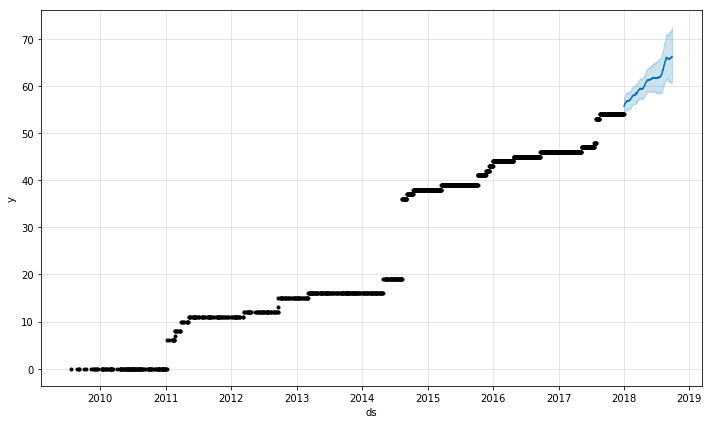

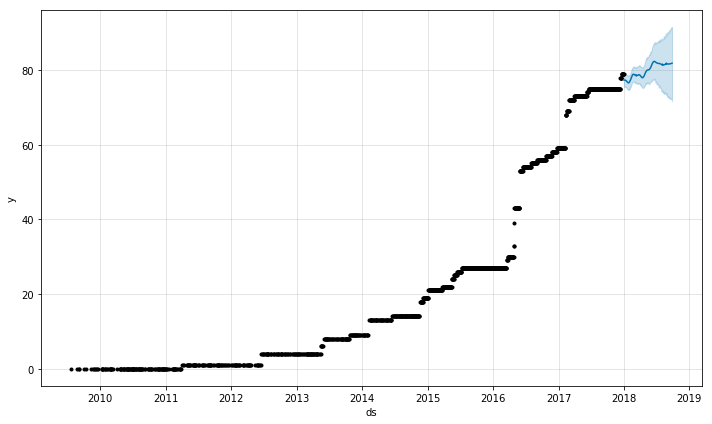

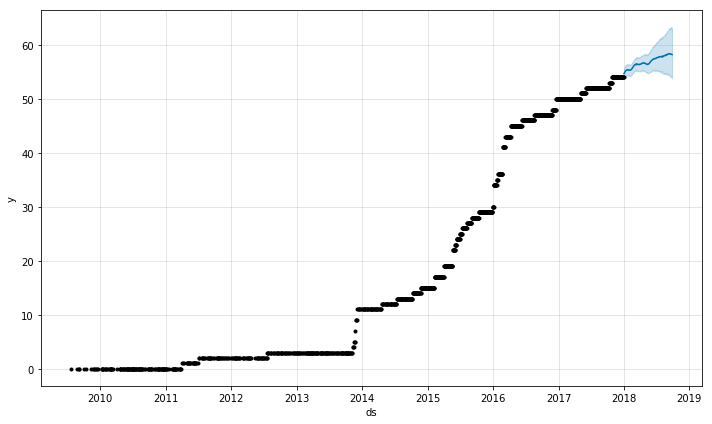

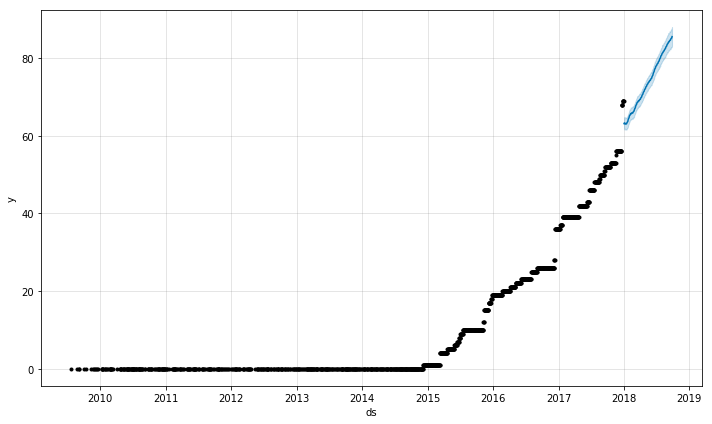

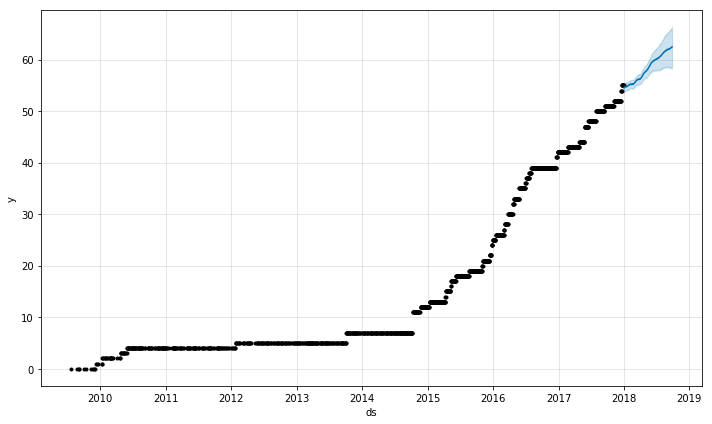

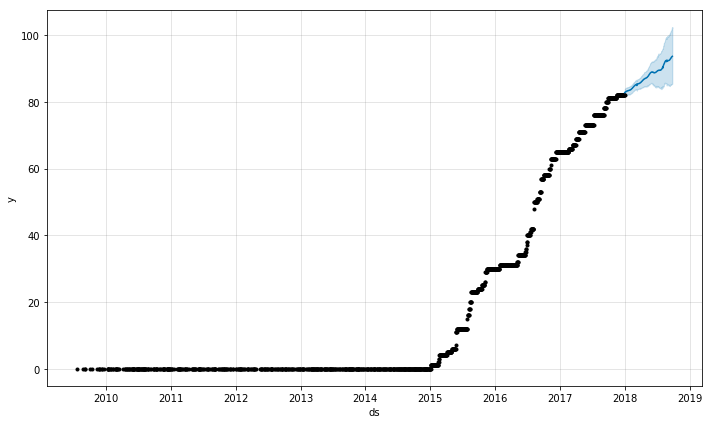

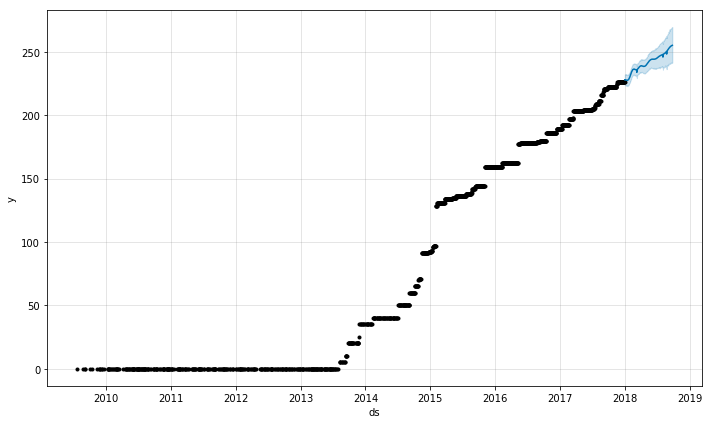

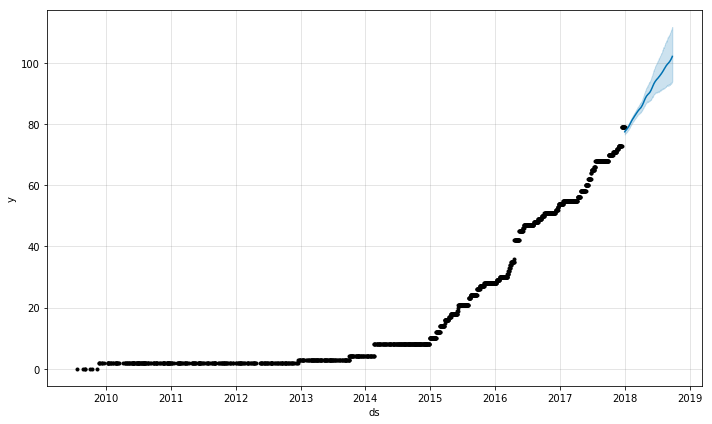

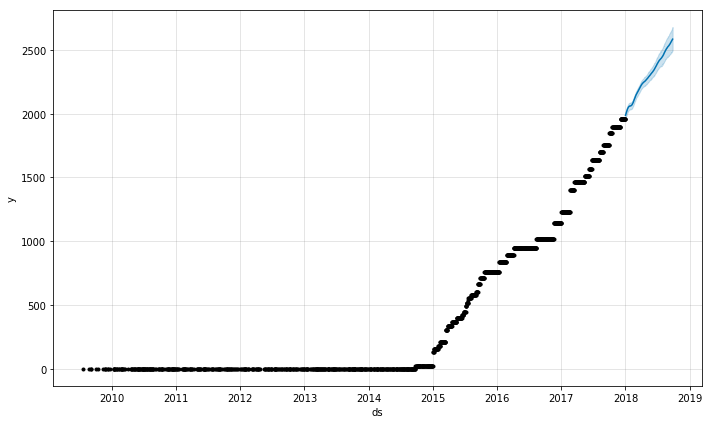

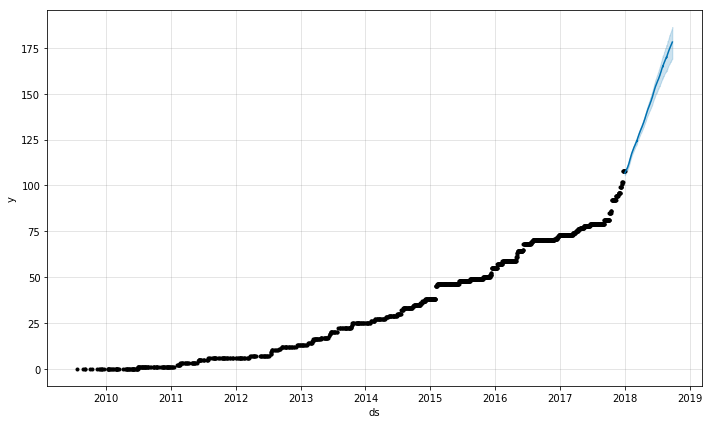

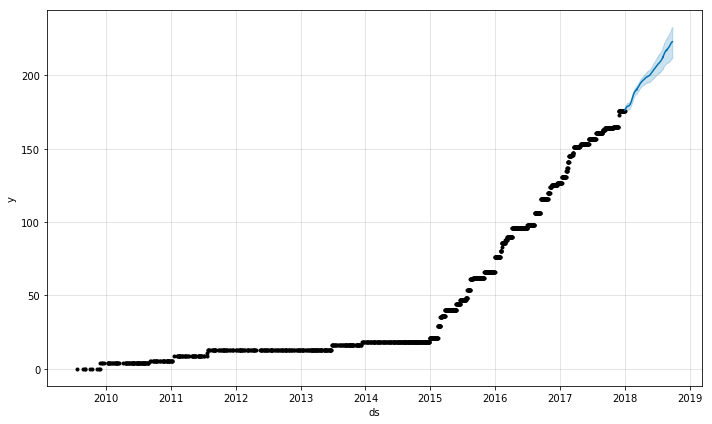

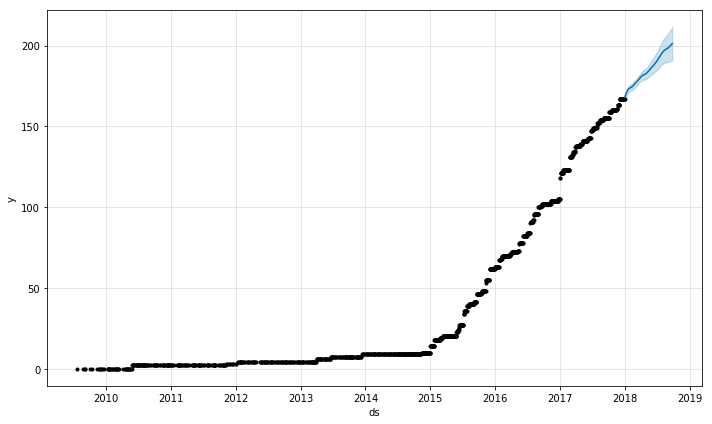

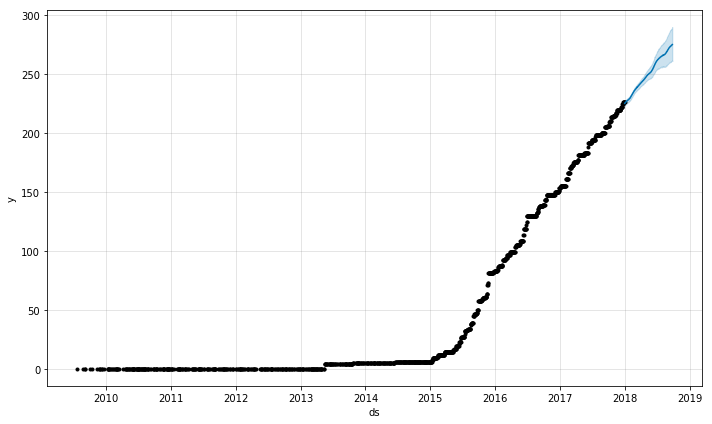

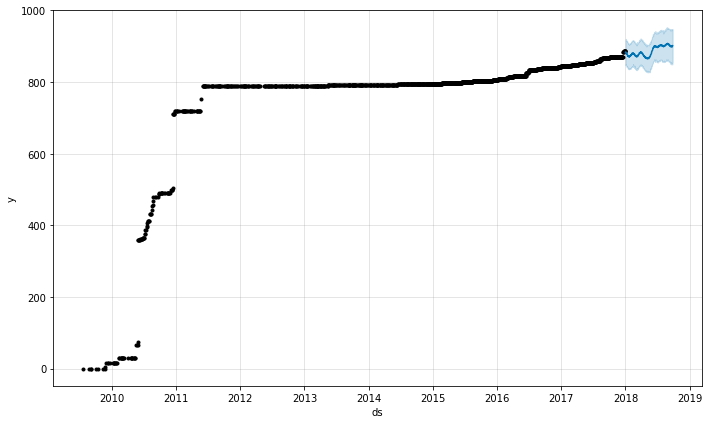

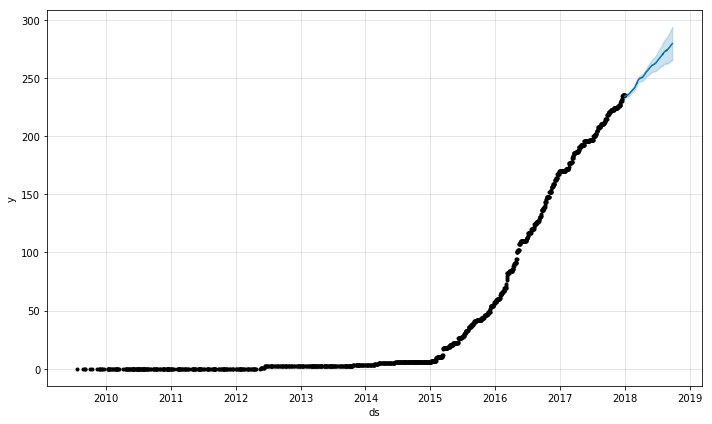

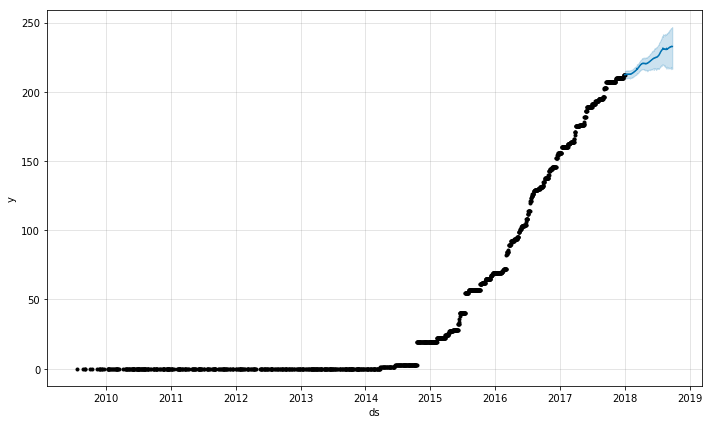

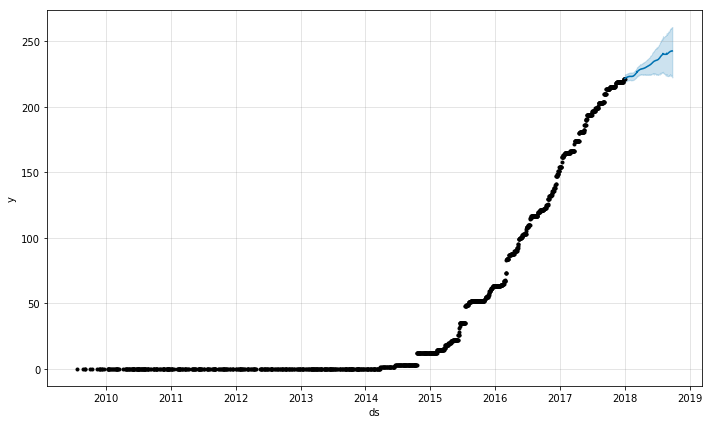

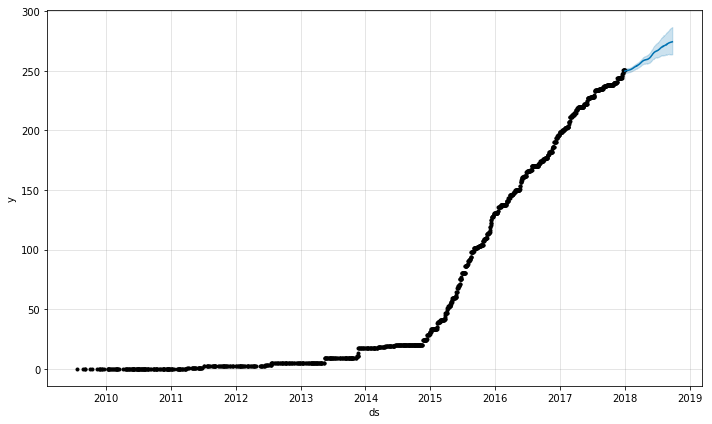

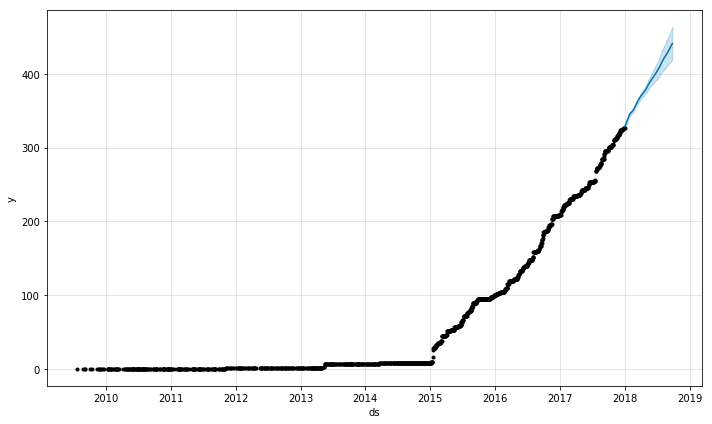

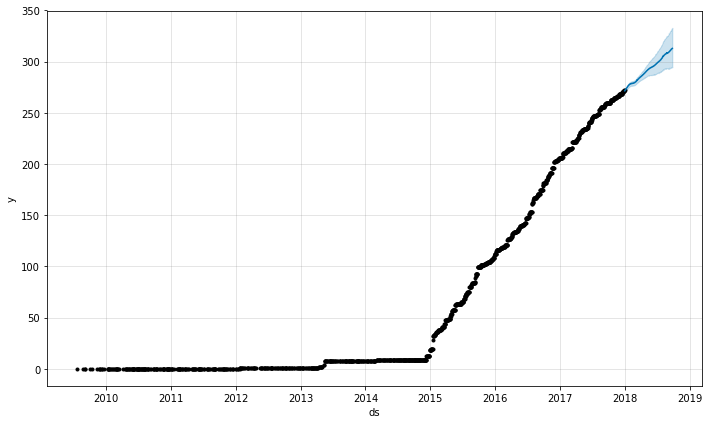

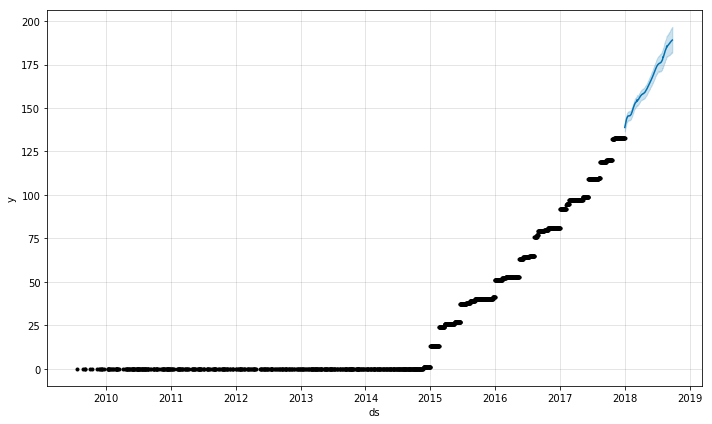

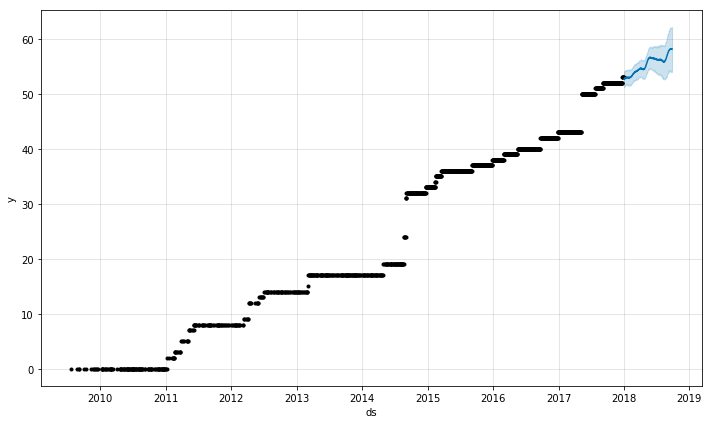

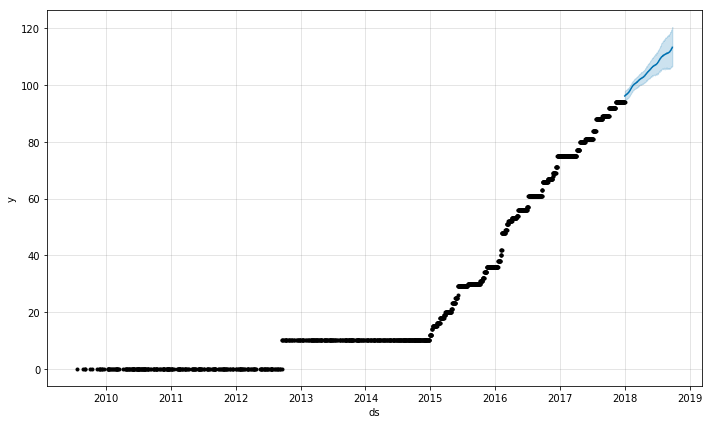

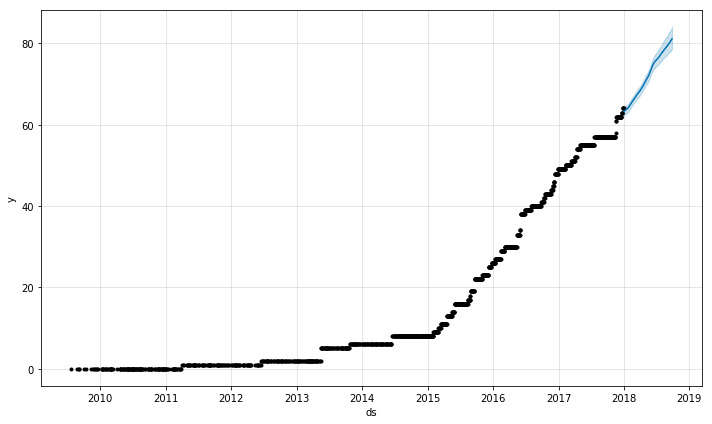

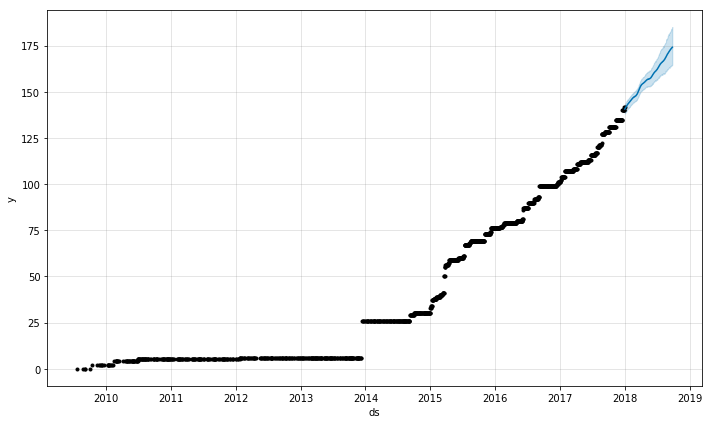

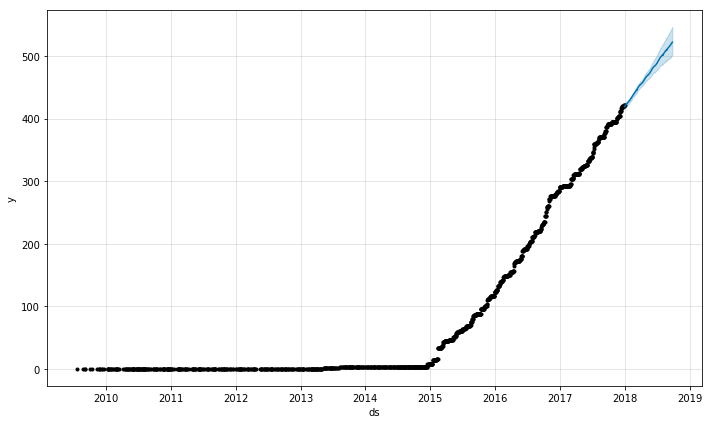

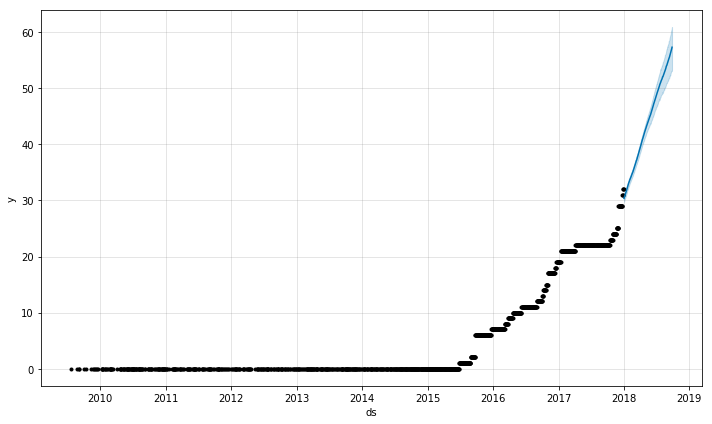

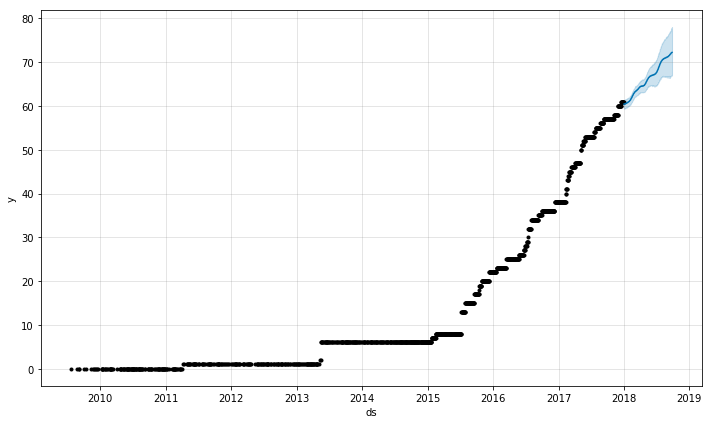

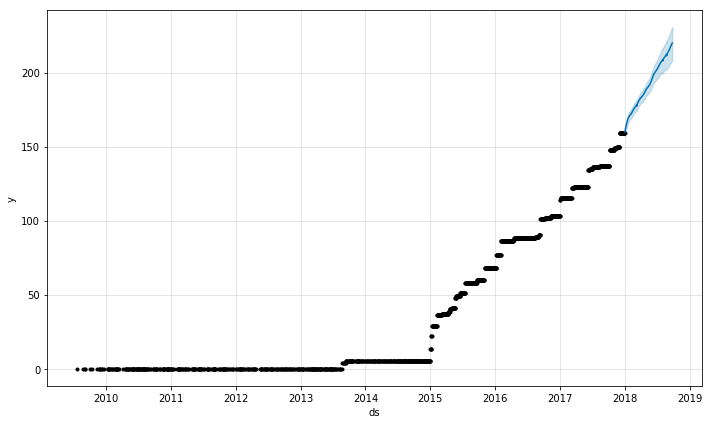

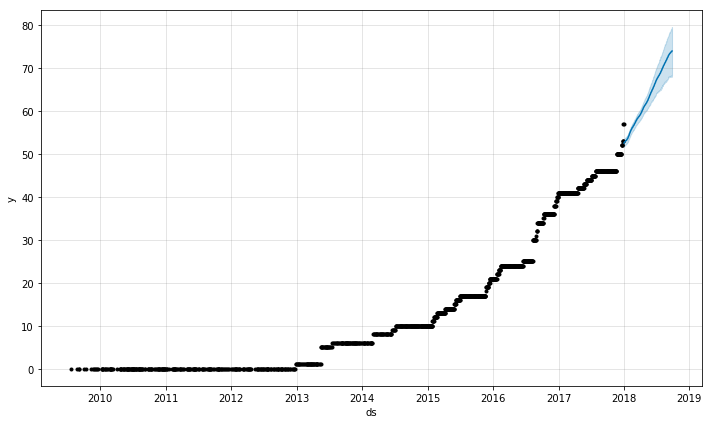

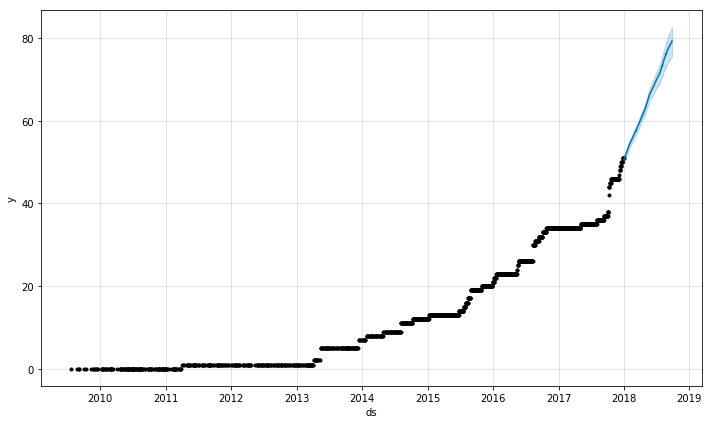

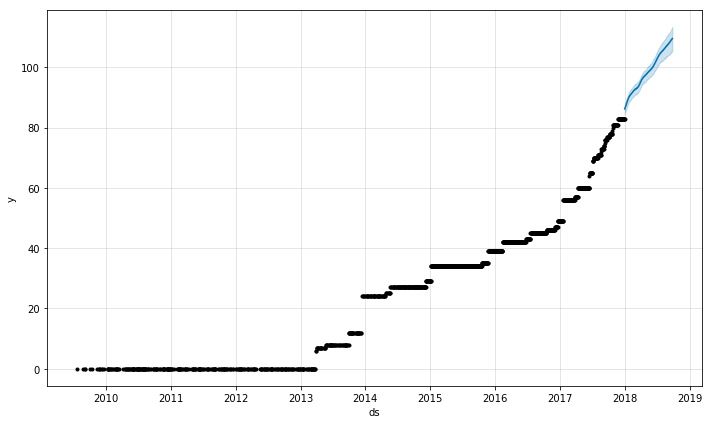

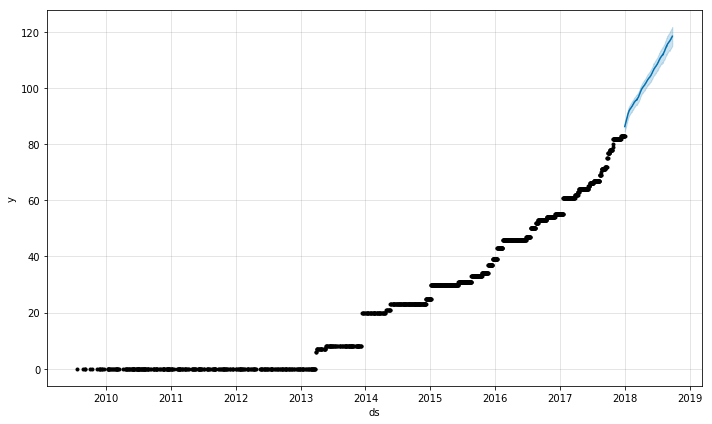

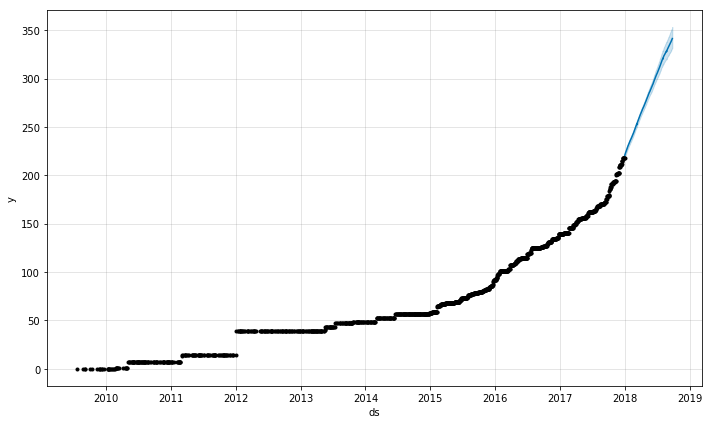

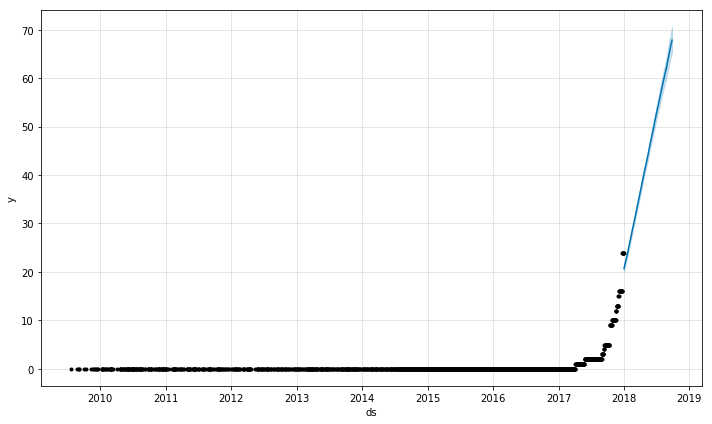

In [21]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in list1_final:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    m.plot(forecast)

# Analyse 2: what kind of pieces can not be well predicted by Prophet ?

/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/qiuqiuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

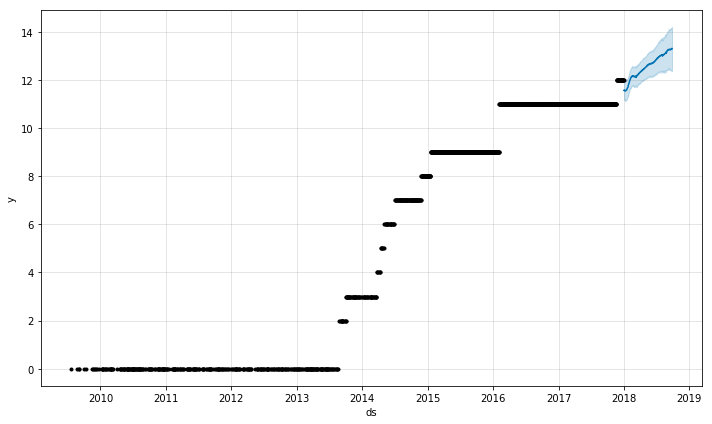

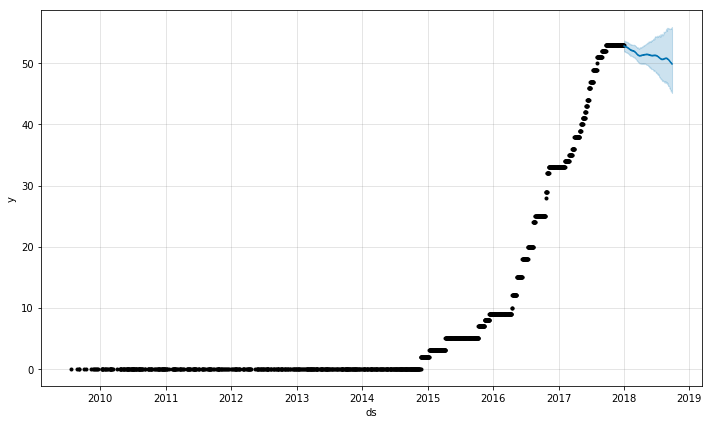

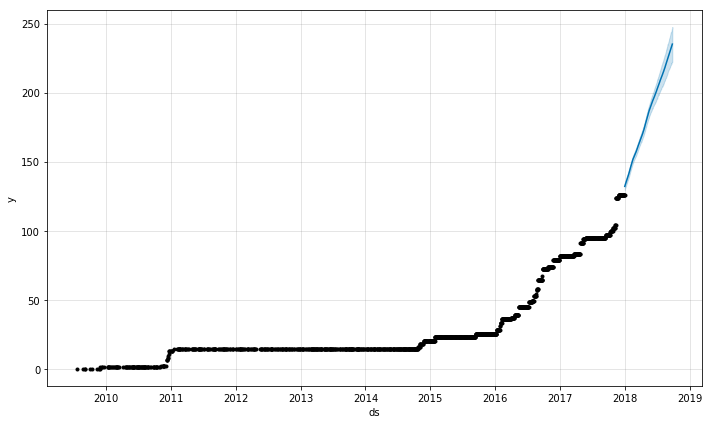

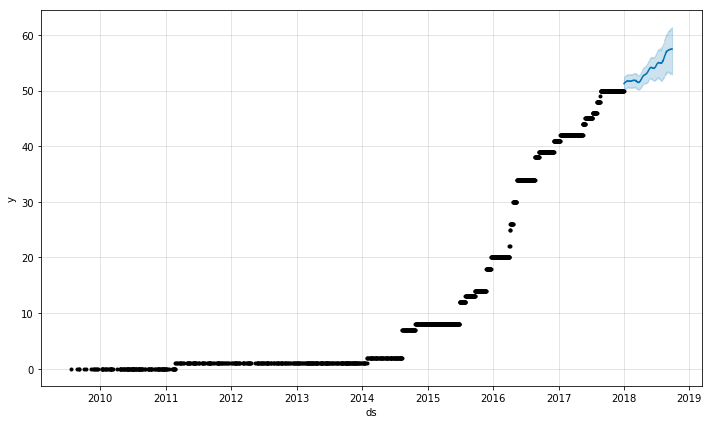

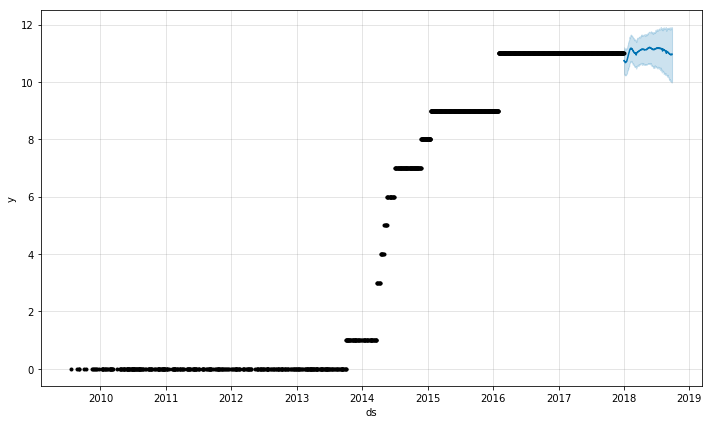

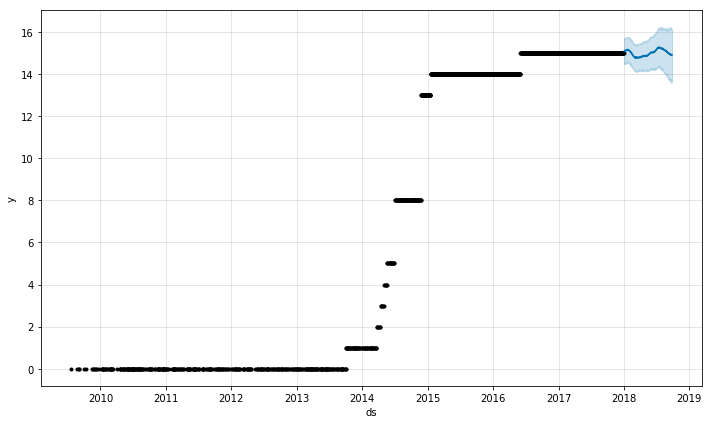

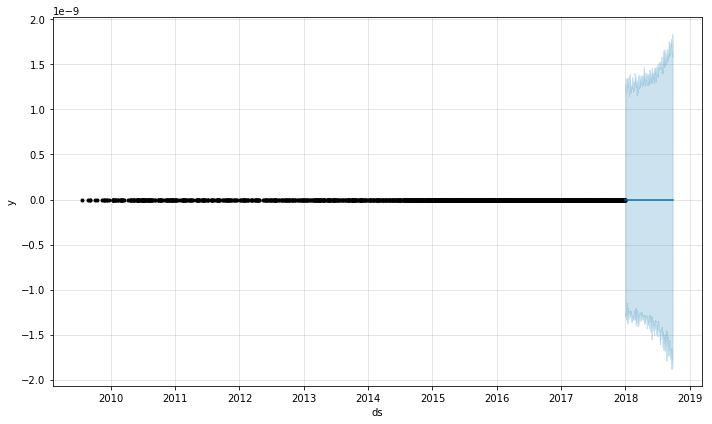

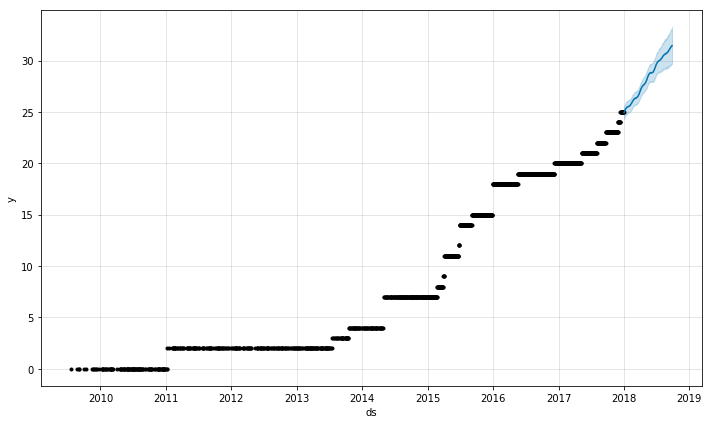

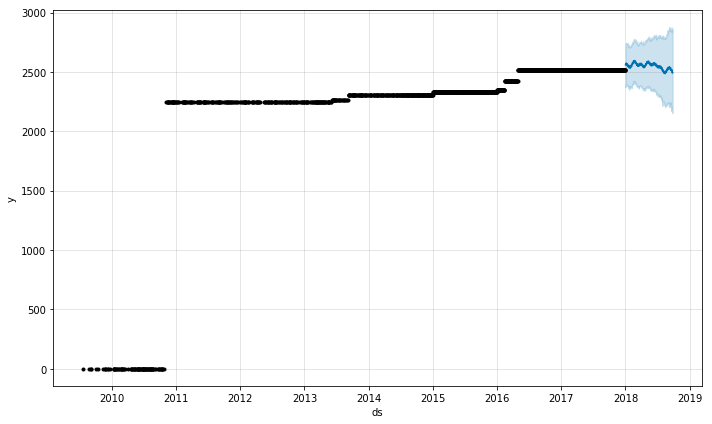

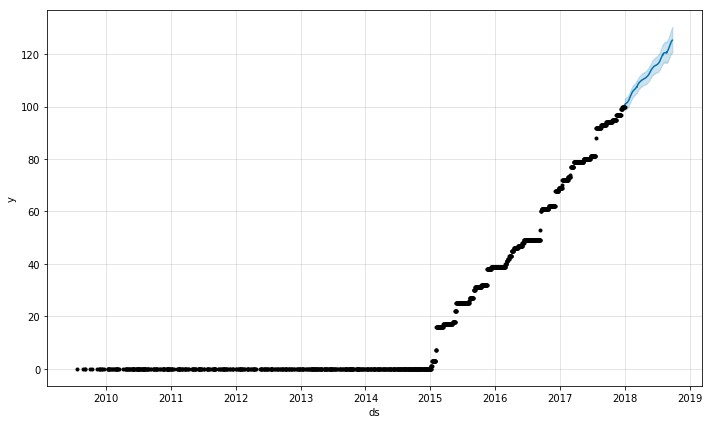

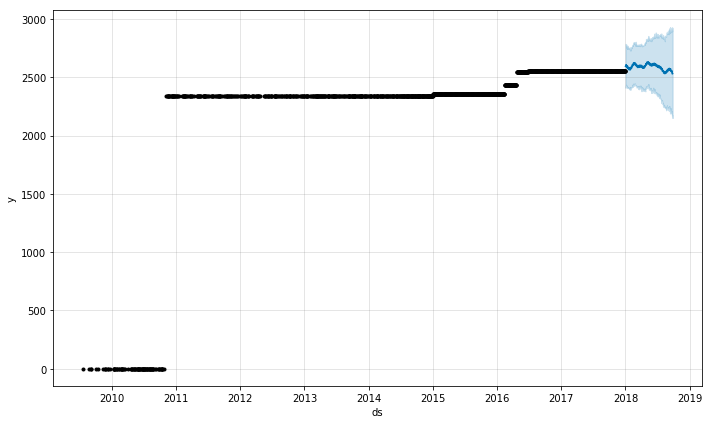

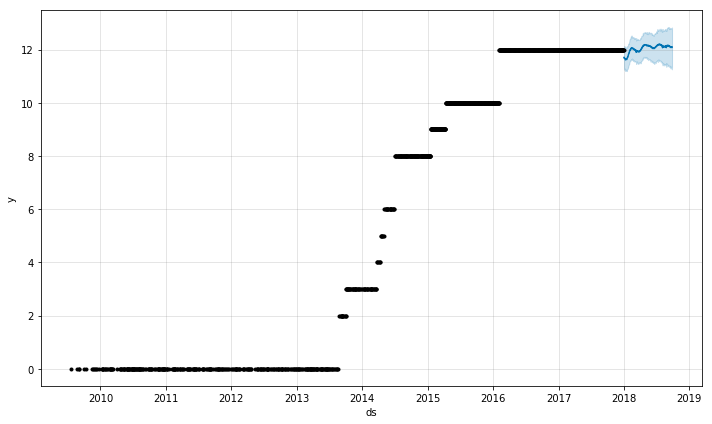

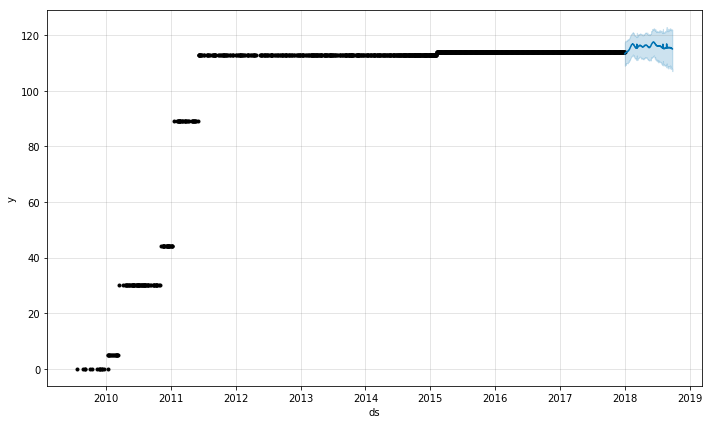

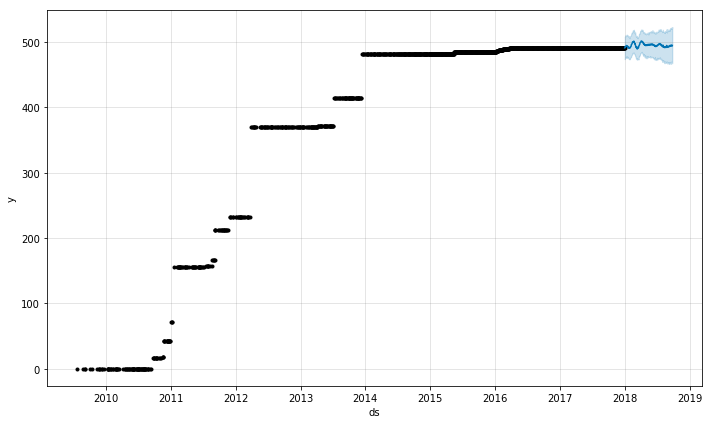

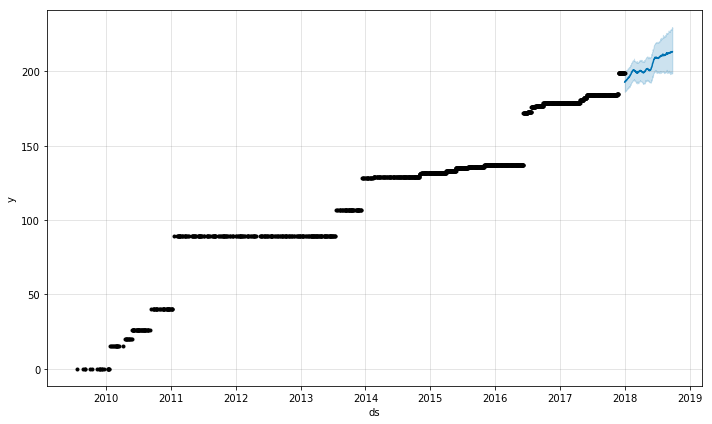

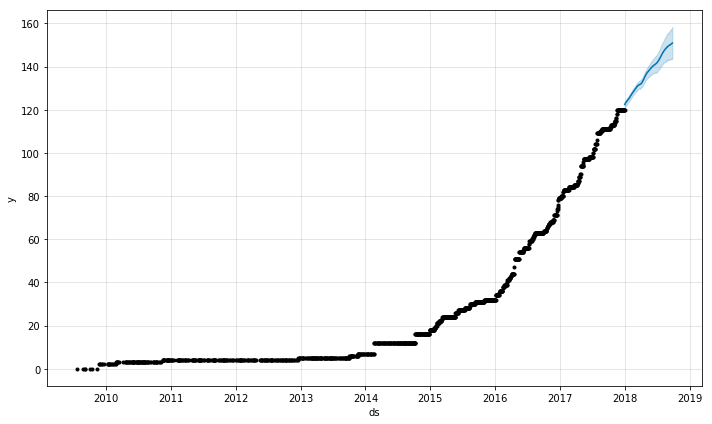

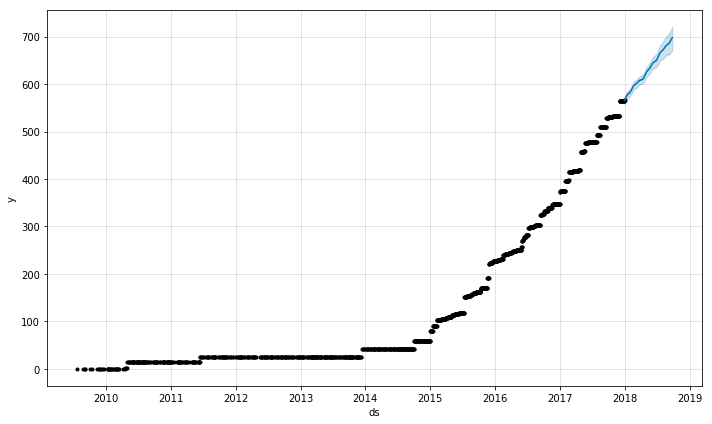

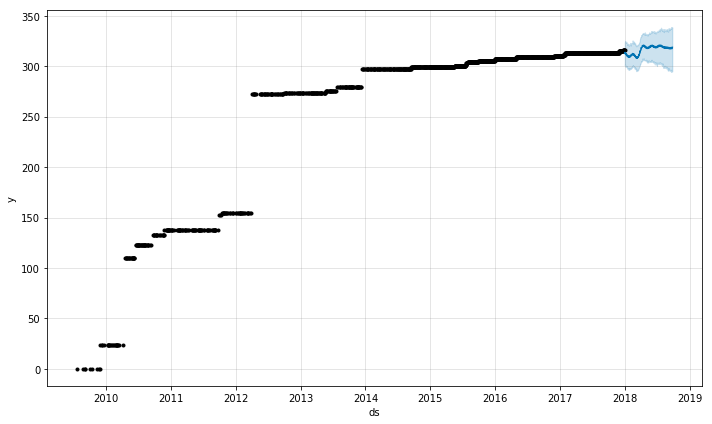

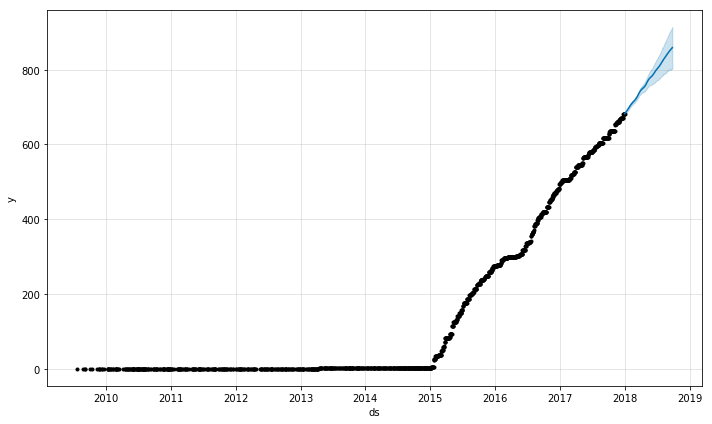

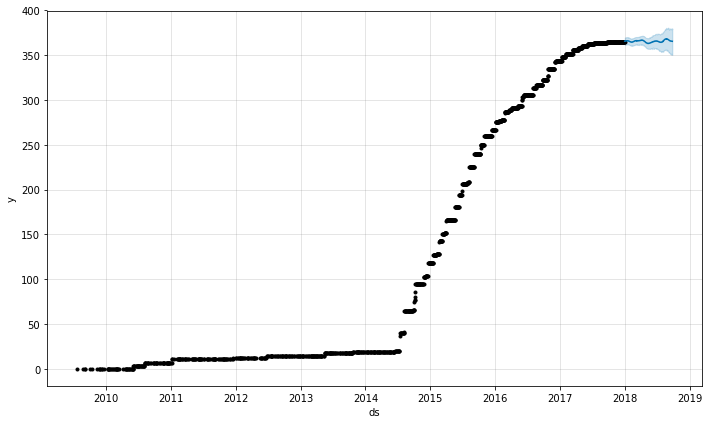

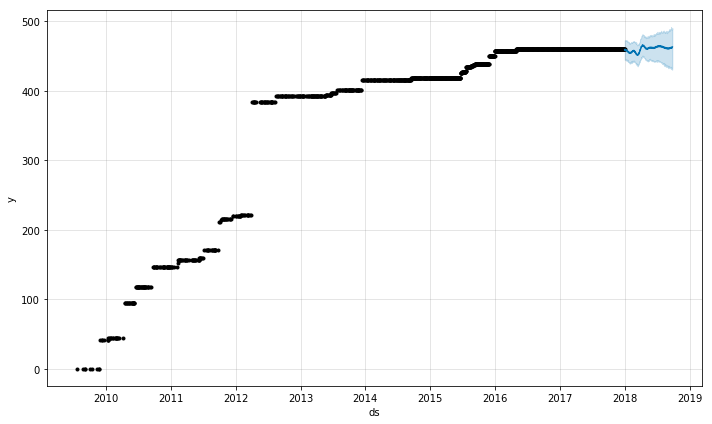

In [22]:
f=pd.read_csv('LRU_order_among_the_years.csv', header=1)


# delete the first line 
f=f.drop(f.index[0])
f.reset_index(drop=True, inplace=True)

#choose the spare part we want, delete other colomns  and change the formula to do ''Prophet'' training
for PARA in worst_4:
    df=f[['LRU',PARA]]
    df['ds'] = df['LRU']
    df['y'] = df[PARA]
    df = df.drop(['LRU',PARA],axis=1)
    ## do the sum of commandes and get the new list  
    Sum_Aberaeron = df
    Sum_Aberaeron.reset_index(drop=True, inplace=True)
    Sum_Aberaeron['ds'] = pd.to_datetime(Sum_Aberaeron['ds'])
    Sum_Aberaeron.sort_values('ds',inplace=True)
    Sum_Aberaeron['cumsum']=Sum_Aberaeron['y'].cumsum()
    Sum_Aberaeron['y']=Sum_Aberaeron['cumsum']
    Sum_Aberaeron  =Sum_Aberaeron.drop(['cumsum'],axis=1)
    
    # split the training set and test set: training :'from 2009 to '20171231' , testing :'from 20180101 to '20180926' 
    train=Sum_Aberaeron[Sum_Aberaeron['ds']<'20180101']
    test=Sum_Aberaeron[Sum_Aberaeron['ds']>'20171231']
    
    #prophet traing
    m = Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=1, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)
    m.fit(train)
    forecast = m.predict(test)
    m.plot(forecast)